In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)
pd.set_option('display.max_columns', None)

In [16]:
# Technical indicators
trend_indicators = ["DMN_10", "ADX_5", "ADX_7"]
oscillators =["MACD_8_21_5", "STOCHk_7_3_3", "RSI_7"]
moving_averages = ["MA_20", "KAMA_3_2_10"]
volatility_indicators = ["Bollinger_Lower", "Bollinger_Upper"]
other_indicators = []

# LOB specific indicators
mid_price_indicators = ["std_mid_price", "weighted_mid_price_variation", "mid_price_variation", "trade_close"]
bid_ask_prices_indicators = ["std_spread", "mean_spread"]
volume_indicators = ["total_bid_volume", "total_ask_volume", "std_best_bid_size", "last_best_ask_size"]
orders_indicators = ["mean_order_book_imbalance", "order_book_imbalance_5s", "order_flow_5s", "last_order_book_imbalance", "total_net_order_flow"]

time_indicators = ['time_since_open']

# Feature list
features = trend_indicators + oscillators + moving_averages + volatility_indicators + other_indicators + mid_price_indicators + bid_ask_prices_indicators + volume_indicators + orders_indicators + time_indicators

In [17]:
features = [
    "last_order_book_imbalance",
    "weighted_mid_price_last",
    "MA_20",
    "total_ask_volume",
    "last_best_ask_size",
    "total_net_order_flow",
    "total_bid_volume",
    "weighted_mid_price_variation",
    "Bollinger_Upper",
    "num_canceled_orders",
    "mid_price_variation",
    "ADX_5",
    "num_added_orders",
    "std_best_ask_size",
    "DMN_10",
    "Bollinger_Lower",
    "U_minus_L",
    "DMN_5",
    "mean_order_book_imbalance",
    "ADX_10",
    "DMP_10",
    "ask_volume_variation",
    "AO_5_10",
    "ADX_7",
    "mean_mid_price_variation"
]


In [18]:
sampling_rate = "1s"
prediction_column = "mean_mid_price_variation_class"
batch_size = 32
look_back = 16

mid_price_variation_class_threshold = 0.0

In [19]:
from tf_preprocessing import process_and_combine_data

start_date = "2024-10-03"
end_date = "2024-10-10"

all_data = process_and_combine_data(start_date, end_date, data_folder="../AAPL_data", sampling_rate=sampling_rate)

print(all_data.columns)

all_data.head()

Index(['mid_price_first', 'mid_price_last', 'mid_price_high', 'mid_price_low',
       'mid_price_mean', 'std_mid_price', 'weighted_mid_price_first',
       'weighted_mid_price_last', 'weighted_mid_price_mean', 'last_spread',
       'mean_spread', 'std_spread', 'last_best_bid_price',
       'mean_best_bid_price', 'last_best_ask_price', 'mean_best_ask_price',
       'last_best_bid_size', 'mean_best_bid_size', 'std_best_bid_size',
       'last_best_ask_size', 'mean_best_ask_size', 'std_best_ask_size',
       'mean_second_ask_price', 'mean_second_bid_price', 'mid_price_variation',
       'mid_price_variation_class', 'mean_mid_price_variation',
       'mean_mid_price_variation_class', 'weighted_mid_price_variation',
       'weighted_mid_price_variation_class', 'total_bid_volume',
       'total_ask_volume', 'mean_order_book_imbalance',
       'last_order_book_imbalance', 'total_net_order_flow', 'num_added_orders',
       'num_canceled_orders', 'num_traded_orders', 'order_book_imbalance_5s',


,mid_price_first,mid_price_last,mid_price_high,mid_price_low,mid_price_mean,std_mid_price,weighted_mid_price_first,weighted_mid_price_last,weighted_mid_price_mean,last_spread,mean_spread,std_spread,last_best_bid_price,mean_best_bid_price,last_best_ask_price,mean_best_ask_price,last_best_bid_size,mean_best_bid_size,std_best_bid_size,last_best_ask_size,mean_best_ask_size,std_best_ask_size,mean_second_ask_price,mean_second_bid_price,mid_price_variation,mid_price_variation_class,mean_mid_price_variation,mean_mid_price_variation_class,weighted_mid_price_variation,weighted_mid_price_variation_class,total_bid_volume,total_ask_volume,mean_order_book_imbalance,last_order_book_imbalance,total_net_order_flow,num_added_orders,num_canceled_orders,num_traded_orders,order_book_imbalance_5s,order_flow_5s,bid_volume_variation,ask_volume_variation,bid_price_variation,ask_price_variation,trade_open,trade_close,trade_high,trade_low,ADX_5,ADX_7,ADX_10,DMP_5,DMP_10,DMN_5,DMN_10,AROONU_7,AROOND_7,OLL3,OLL5,OLL10,OLL15,OHH3,OHH5,STOCHk_7_3_3,STOCHd_7_3_3,MACD_8_21_5,RSI_7,AO_5_10,EMA_15,HMA_10,KAMA_3_2_10,MA_10,MA_20,rmCO(3),rmCO(4),rmCO(5),rmCO(6),Bollinger_Upper,Bollinger_Lower,U_minus_L,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,is_monday,is_friday
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-03 09:30:30-04:00,225.425,225.415,225.470,225.380,225.424804,0.024199,225.422363,225.420000,225.425418,0.05,0.040667,0.010346,225.39,225.404471,225.44,225.445137,75.0,117.262745,127.519574,50.0,90.443137,55.577106,225.455490,225.394235,-0.000044,0.0,-8.698167e-07,0,-0.000010,0,662,730,0.129992,0.200000,25,117,108,30,-0.084121,-48.0,25.0,-57.0,0.0,0.0,225.44,225.43,225.49,225.39,24.504121,22.449057,23.683889,24.422705,30.841584,21.324074,21.701709,42.857143,100.000000,0.045,0.045,0.045,0.045,0.045,0.125,20.588235,21.157495,-0.002456,44.103891,0.00425,225.441008,225.427909,225.436702,225.4300,225.45675,-0.005000,-0.02125,5.684342e-15,-0.009167,225.541383,225.372117,0.169266,0.043416,-0.010,0.005,-0.010,-0.070,0.09,0.030,30.0,0,0
2024-10-03 09:30:31-04:00,225.415,225.435,225.455,225.415,225.431584,0.012766,225.420000,225.424368,225.433825,0.05,0.049505,0.011079,225.41,225.406832,225.46,225.456337,50.0,92.455446,80.477888,124.0,77.623762,45.684100,225.466733,225.394851,0.000089,2.0,7.357167e-05,1,0.000019,1,525,-501,0.088194,-0.425287,-74,46,48,7,-0.095952,-46.4,-25.0,74.0,0.0,0.0,225.46,225.43,225.47,225.43,20.957985,20.968478,23.054994,21.044446,28.867149,18.374431,20.312396,28.571429,85.714286,0.035,0.035,0.035,0.035,0.055,0.075,32.352941,24.098672,-0.000378,49.169153,-0.00050,225.440257,225.428818,225.436444,225.4280,225.45250,0.005000,0.00125,-1.300000e-02,0.003333,225.532406,225.372594,0.159812,0.040991,0.020,-0.010,0.005,-0.010,0.04,0.045,31.0,0,0
2024-10-03 09:30:32-04:00,225.435,225.385,225.435,225.375,225.403411,0.020339,225.424368,225.377692,225.402247,0.03,0.044341,0.008913,225.37,225.381240,225.40,225.425581,50.0,99.651163,132.561581,145.0,108.558140,85.022507,225.436202,225.370698,-0.000222,0.0,-1.401253e-04,0,-0.000207,0,-1500,946,-0.043226,-0.487179,-95,62,65,2,-0.033563,-66.0,0.0,21.0,0.0,0.0,225.44,225.41,225.44,225.41,21.922691,19.463121,21.005580,16.710449,26.084042,28.319973,24.781452,14.285714,100.000000,0.060,0.060,0.060,0.060,0.035,0.035,5.714286,19.551821,-0.003572,38.890230,-0.00875,225.433350,225.421000,225.427185,225.4265,225.44600,-0.013333,-0.00875,-9.000000e-03,-0.019167,225.525662,225.366338,0.159324,0.040866,-0.050,0.020,-0.010,0.005,0.06,0.040,32.0,0,0
2024-10-03 09:30:33-04:00,225.385,225.420,225.430,225.380,225.404873,0.014985,225.377692,225.426667,225.407838,0.04,0.039915,0.009563,225.40,225.384915,225.44,225.424831,50.0,108.567797,69.741829,25.0,74.228814,33.690753,225.436102,225.371186,0.000155,2.0,8.817304e-05,1,0.000217,1,975,-512,0.185999,0.333333,25,58,52,8,0.052612,-35.2,0.0,-120.0,0.0,0.0,225.40,225.44,225.44,225.39,22.694455,18.172815,19.161107,13.

In [20]:
all_data.mean_mid_price_variation_class.value_counts()

mean_mid_price_variation_class
0    41805
1    37987
Name: count, dtype: int64

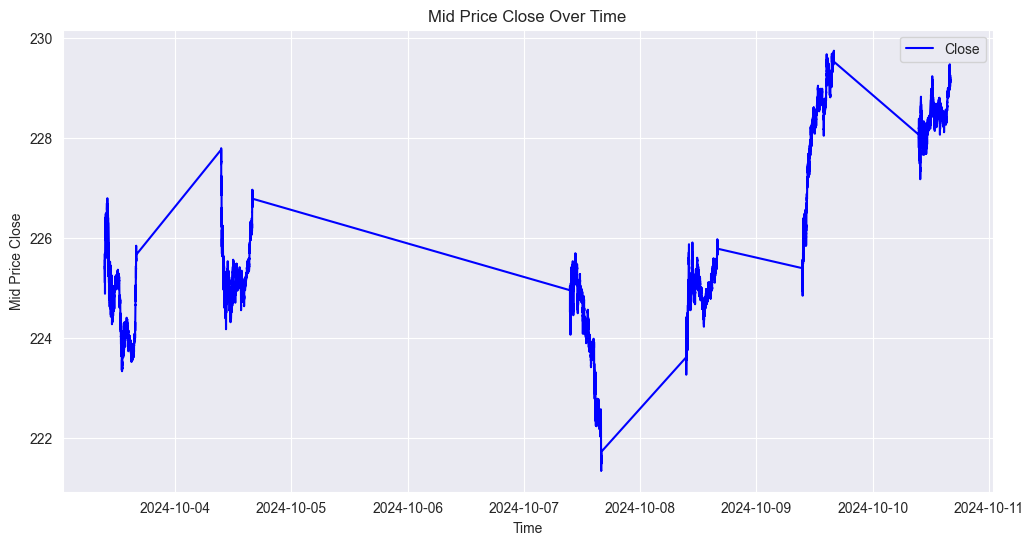

In [21]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data["trade_close"], label="Close", color="blue")
plt.xlabel("Time")
plt.ylabel("Mid Price Close")
plt.title("Mid Price Close Over Time")
plt.legend()
plt.show()

In [22]:
# Data Splitting
train_size = int(len(all_data) * 0.7)
val_size = int(len(all_data) * 0.1)
test_size = len(all_data) - train_size - val_size

train_df = all_data.iloc[:train_size, :]
val_df = all_data.iloc[train_size:train_size + val_size, :]
test_df = all_data.iloc[train_size + val_size:, :]

In [ ]:
from keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler

class TimeSeriesScalerGenerator(Sequence):
    def __init__(self, data, target, features, look_back, batch_size, **kwargs):
        super().__init__(**kwargs)  # Call the superclass constructor with **kwargs

        self.data = data[features].values
        self.targets = data[target].values.astype(int)
        self.features = features
        self.look_back = look_back
        self.batch_size = batch_size
        self.scaler = MinMaxScaler(feature_range=(0, 1))

        # Store true labels for the entire dataset
        self.true_labels = self.targets[look_back:]

        # Compute valid indices for sequence extraction
        self.indices = np.arange(len(self.data) - self.look_back)

    def __len__(self):
        """Returns the number of batches per epoch."""
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        """Generates one batch of data."""
        batch_indices = self.indices[idx * self.batch_size : (idx + 1) * self.batch_size]

        # Extract sequences and labels
        batch_data = np.array([self.data[i : i + self.look_back] for i in batch_indices])
        batch_labels = np.array([self.targets[i + self.look_back] for i in batch_indices])

        # Normalize each sequence individually
        batch_data = np.array([self.scaler.fit_transform(seq) for seq in batch_data])

        return batch_data, batch_labels

    def on_epoch_end(self):
        """Called at the end of each epoch."""
        pass

In [ ]:
# Comment/Uncomment to scale by batch
train_gen = TimeSeriesScalerGenerator(train_df, prediction_column, features, look_back=look_back, batch_size=batch_size)
val_gen = TimeSeriesScalerGenerator(val_df, prediction_column, features, look_back=look_back, batch_size=batch_size)
test_gen = TimeSeriesScalerGenerator(test_df, prediction_column, features, look_back=look_back, batch_size=batch_size)

In [25]:
# # Comment/Uncomment to use scale all training data at once
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Fit scalers on training data only
# minmax_scaler = MinMaxScaler(feature_range=(0, 1)).fit(train_df[features])

# # Apply scalers to training, validation, and test sets
# # VERIFY if the scaled values are totally unreadable or still manageable
# train_scaled = minmax_scaler.transform(train_df[features])
# val_scaled = minmax_scaler.transform(val_df[features])
# test_scaled = minmax_scaler.transform(test_df[features])

# # Extract targets separately
# train_target = train_df[prediction_column].values
# val_target = val_df[prediction_column].values
# test_target = test_df[prediction_column].values

# # Create generators with pre-scaled data
# train_gen = TimeSeriesGenerator(train_scaled, train_target, look_back=look_back, batch_size=batch_size)
# val_gen = TimeSeriesGenerator(val_scaled, val_target, look_back=look_back, batch_size=batch_size)
# test_gen = TimeSeriesGenerator(test_scaled, test_target, look_back=look_back, batch_size=batch_size)

In [32]:
from keras import layers, models, optimizers

num_classes = len(np.unique(all_data[prediction_column]))

def create_model():
    input_size = len(features)
    inputs = layers.Input(shape=(look_back, input_size))

    # First LSTM layer
    x = layers.LSTM(128, return_sequences=True)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)

    # Second LSTM layer
    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Dense layers
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

num_models = 1
epochs = 10
all_predictions = []

for i in range(num_models):
    print(f"Training model {i + 1}/{num_models}")
    tf.random.set_seed(i + 1)
    model = create_model()
    optimizer = optimizers.Adam(learning_rate=0.001)
    # optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=optimizer, 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    
    model.fit(train_gen, validation_data=val_gen, epochs=epochs)
    
    predictions = model.predict(test_gen)
    all_predictions.append(predictions)


Training model 1/1
Epoch 1/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.5230 - loss: 0.7668 - val_accuracy: 0.5348 - val_loss: 0.7465
Epoch 2/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.5532 - loss: 0.6855 - val_accuracy: 0.4878 - val_loss: 0.7387
Epoch 3/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.5389 - loss: 0.6914 - val_accuracy: 0.5400 - val_loss: 0.8111
Epoch 4/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.5541 - loss: 0.6845 - val_accuracy: 0.5161 - val_loss: 0.7158
Epoch 5/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.5495 - loss: 0.6838 - val_accuracy: 0.4690 - val_loss: 0.7547
Epoch 6/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.5549 - loss: 0.6837 - val_accuracy: 0.4655 - val_loss: 0.7693
Epoch 7/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.5536 - loss: 0.6833 - val_accuracy: 0.5163 - val_loss: 0.7096
Epoch 8/10
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step -

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_evaluation_metrics(y_true, y_pred, log_probabilities):
    probabilities = np.exp(log_probabilities)
    unique_classes = np.unique(y_true)
    num_classes = len(unique_classes)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    class_labels = ["Down (0)", "Up (1)"] if num_classes == 2 else ["Down (0)", "Constant (1)", "Up (2)"]
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[0],
        xticklabels=class_labels,
        yticklabels=class_labels,
    )
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")

    # Histogram of Predicted Probabilities
    for i, class_label in enumerate(class_labels):
        sns.histplot(
            probabilities[y_true == unique_classes[i]][:, i], bins=30, label=class_label, ax=axes[1]
        )
    axes[1].set_title("Probability Distribution")
    axes[1].set_xlabel("Predicted Probability")
    axes[1].legend()

    # Scatter Plot of Predictions
    scatter = sns.scatterplot(
        x=np.arange(len(probabilities)),
        y=probabilities.max(axis=1),
        hue=y_true,
        palette={0: "red", 1: "blue"} if num_classes == 2 else {0: "red", 1: "blue", 2: "green"},
        alpha=0.7,
        ax=axes[2],
    )
    axes[2].set_title("Scatter Plot of Predictions")
    axes[2].set_xlabel("Sample Index")
    axes[2].set_ylabel("Max Predicted Probability")

    handles, labels = scatter.get_legend_handles_labels()
    axes[2].legend(handles, class_labels, title="True Class")

    axes[2].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

    # Print Evaluation Metrics
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))

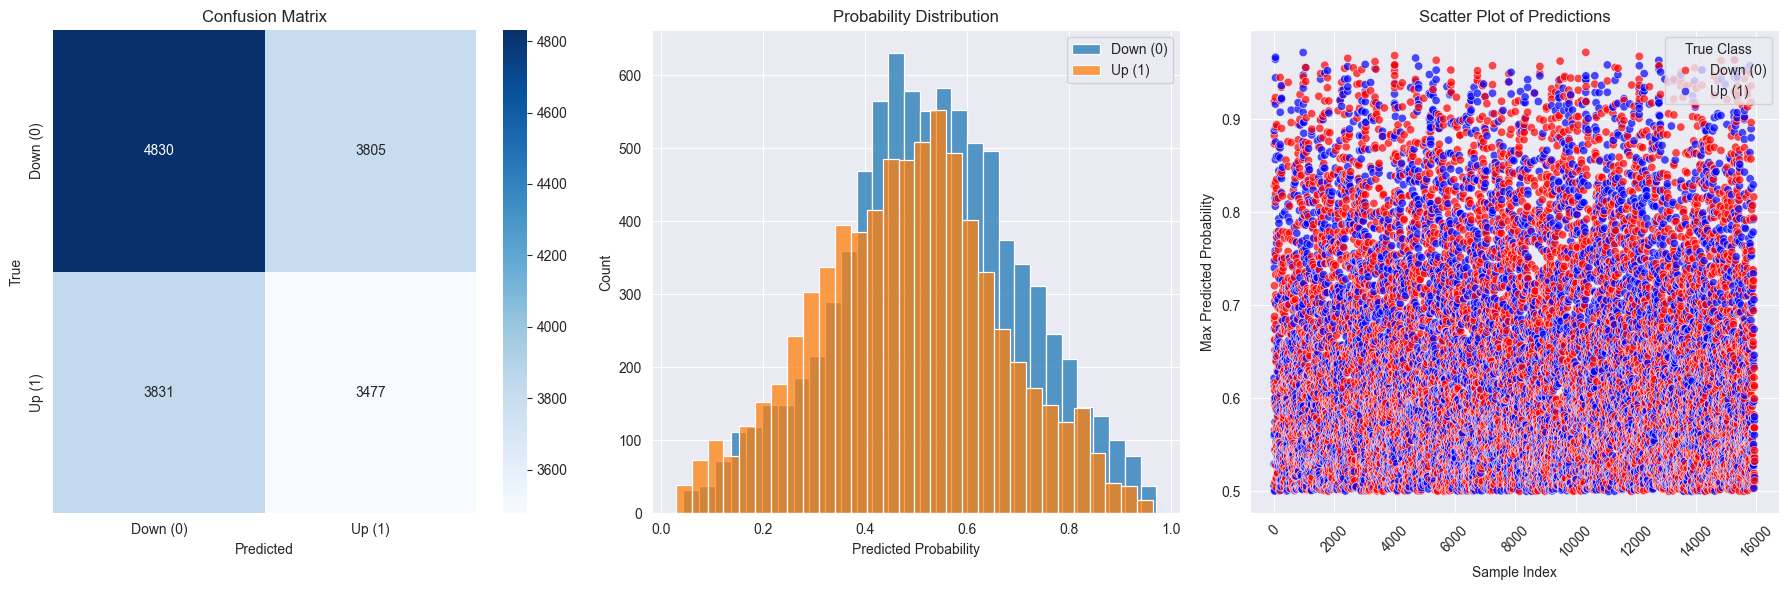

Accuracy: 0.5210
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      8635
           1       0.48      0.48      0.48      7308

    accuracy                           0.52     15943
   macro avg       0.52      0.52      0.52     15943
weighted avg       0.52      0.52      0.52     15943



In [28]:
# Convert predictions to class labels
all_predictions = np.array(all_predictions)
predicted_classes = np.argmax(all_predictions, axis=-1)

# Majority voting
final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predicted_classes)

# Compute log probabilities for evaluation
log_probabilities = np.log(np.mean(all_predictions, axis=0))

# Evaluate the final predictions
y_true = test_gen.true_labels  # Assuming test_gen has the true labels

# Ensure log_probabilities shape matches the number of classes in y_true
if num_classes == 2:
    log_probabilities = log_probabilities[:, :2]

plot_evaluation_metrics(y_true, final_predictions, log_probabilities)

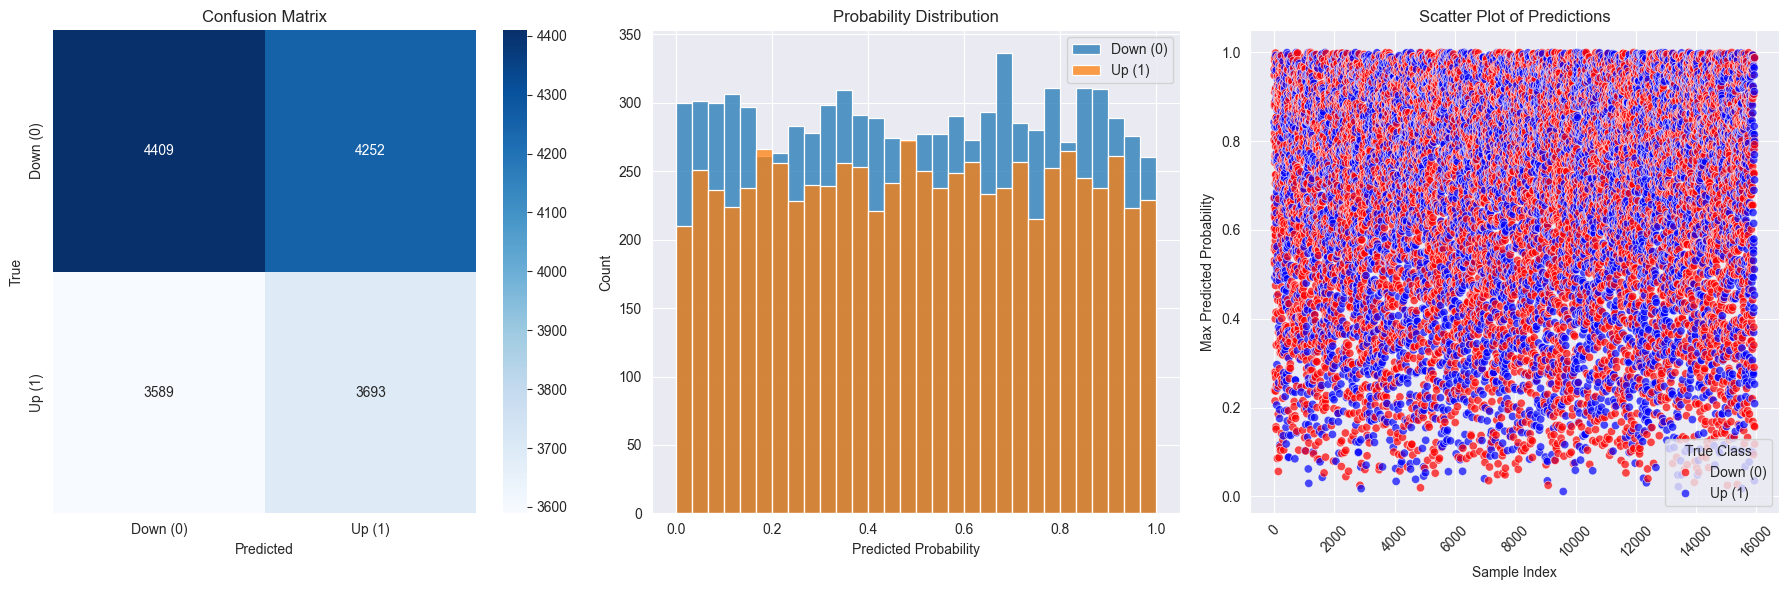

Accuracy: 0.5082
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      8661
           1       0.46      0.51      0.49      7282

    accuracy                           0.51     15943
   macro avg       0.51      0.51      0.51     15943
weighted avg       0.51      0.51      0.51     15943



In [29]:
# Determine the number of classes
num_classes = len(np.unique(final_predictions))

# Implement a random strategy
random_y_pred = np.random.randint(0, num_classes, size=len(final_predictions))
random_log_probabilities = np.log(np.random.rand(len(final_predictions), num_classes))

# Plot evaluation metrics for the random strategy
plot_evaluation_metrics(final_predictions, random_y_pred, random_log_probabilities)